In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "c:/DataAnalytics/mouse_drug_data.csv"
clinical_trial_data_to_load = "c:/DataAnalytics/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load,delimiter=",")
clinical_data=pd.read_csv(clinical_trial_data_to_load,delimiter=",")



# Combine the data into a single dataset
combined_clinical_data=pd.merge(mouse_data,clinical_data,how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview

combined_clinical_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Drug_and_time_data=combined_clinical_data.groupby(["Drug","Timepoint"])

# Convert to DataFrame
DandT_Volume_df=pd.DataFrame(Drug_and_time_data["Tumor Volume (mm3)"].mean())
DandT_Volume_df.reset_index(inplace=True)



# Preview DataFrame
DandT_Volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
DandT_volumeSE=combined_clinical_data.groupby(["Drug","Timepoint"]).sem()
DandT_volumeSE = DandT_volumeSE.drop(["Mouse ID","Metastatic Sites"],axis=1)
DandT_volumeSE.reset_index(inplace=True)
DandT_volumeSE.rename(columns={"Tumor Volume (mm3)": "SE Tumor Volume"})
#DandT_volumeSE.head()
final_df=pd.merge(DandT_Volume_df,DandT_volumeSE,how='left',on=(["Drug","Timepoint"]),suffixes=["_mean","_SE"])
#final_df.to_csv("C:/DataAnalytics/tumor_volume.csv")

In [4]:
# Minor Data Munging to Re-Format the Data Frames
DandT_cleaned_df=DandT_Volume_df.pivot('Timepoint','Drug','Tumor Volume (mm3)')
DandT_cleaned_df.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


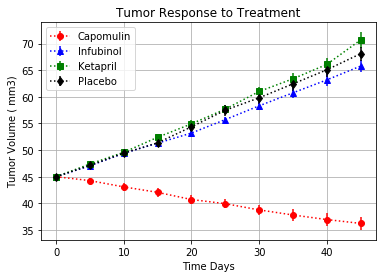

In [5]:
# Generate the Plot (with Error Bars)
#TVolume_bydays = [{ Drug : DandT_Volumedf.loc[DandT_VolumeDF["Drug"]=='Capomulin',:]["Drug"],
 #                   [Timepoint]: 
                                                                                     
#}
drugList=[{"Drug":'Capomulin',
            "Marker":"o", 
             "C" :"red"},
           {"Drug" : "Infubinol",
            "Marker" :"^",
             "C" :"blue"},
           {"Drug": "Ketapril",
             "Marker" :"s",
              "C": "green"},
          { "Drug" : "Placebo",
             "Marker" : "d",
              "C" :"black"}
           ]
for i in range(len(drugList)):
    legend=plt.errorbar(final_df.loc[final_df["Drug"]==drugList[i]["Drug"],:]["Timepoint"],final_df.loc[final_df["Drug"]==drugList[i]["Drug"],:]["Tumor Volume (mm3)_mean"],
          final_df.loc[final_df["Drug"]==drugList[i]["Drug"],:]["Tumor Volume (mm3)_SE"]  ,
                        marker=drugList[i]["Marker"],color=drugList[i]["C"],linestyle='dotted',label=drugList[i]["Drug"])
plt.legend() 
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time Days")
plt.ylabel("Tumor Volume ( mm3)")


# Save the Figure
plt.savefig("C:/DataAnalytics/TumorReponsetotreatment.png")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
DandT_metsite=combined_clinical_data.groupby(["Drug","Timepoint"])
#DandT_metsite["Mean Metsite"]=DAndT_metsite["Metastatic Sites"].mean()
# Convert to DataFrame
DandTmetsite_df=pd.DataFrame(DandT_metsite["Metastatic Sites"].mean())
# Preview DataFrame
DandTmetsite_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
DandT_METSE=combined_clinical_data.groupby(["Drug","Timepoint"]).sem()
DandT_METSE = DandT_METSE.drop(["Mouse ID","Tumor Volume (mm3)"],axis=1)
#DandT_METSE.reset_index(inplace=True)
#DandT_METSE.set_index("Drug")
DandT_volumeSE.rename(columns={"Metastatic Sites": "MetaStatic Sites SE"})
#DandT_volumeSE.head()
final_df1=pd.merge(DandTmetsite_df,DandT_METSE,how='left',on=(["Drug","Timepoint"]),suffixes=["_mean","_SE"])
final_df1.reset_index(inplace=True)
#preview dataframe 
final_df1.head()



,Drug,Timepoint,Metastatic Sites_mean,Metastatic Sites_SE
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


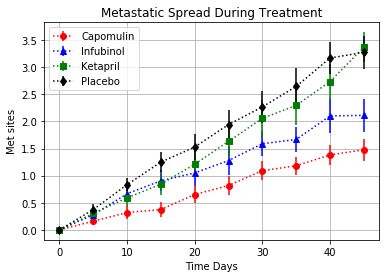

In [10]:
# Generate the Plot (with Error Bars)
drugList=[{"Drug":'Capomulin',
            "Marker":"o", 
             "C" :"red"},
           {"Drug" : "Infubinol",
            "Marker" :"^",
             "C" :"blue"},
           {"Drug": "Ketapril",
             "Marker" :"s",
              "C": "green"},
          { "Drug" : "Placebo",
             "Marker" : "d",
              "C" :"black"}
           ]
for i in range(len(drugList)):
    legend=plt.errorbar(final_df1.loc[final_df1["Drug"]==drugList[i]["Drug"],:]["Timepoint"],final_df1.loc[final_df1["Drug"]==drugList[i]["Drug"],:]["Metastatic Sites_mean"],
          final_df1.loc[final_df1["Drug"]==drugList[i]["Drug"],:]["Metastatic Sites_SE"]  ,
                        marker=drugList[i]["Marker"],color=drugList[i]["C"],linestyle='dotted',label=drugList[i]["Drug"])
plt.legend() 
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time Days")
plt.ylabel("Met sites")


# Save the Figure
plt.savefig("C:/DataAnalytics/Metastatisspreadtreatment.png")


# Save the Figure

# Show the Figure


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
DandT_survivalrate=combined_clinical_data.groupby(["Drug","Timepoint"])
DandT_survivaldf= pd.DataFrame(DandT_survivalrate["Mouse ID"].nunique())
DandT_survivaldf.reset_index(inplace=True)
DandT_survivaldf.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
DandT_survival_pivotdf=DandT_survivaldf.pivot('Timepoint','Drug','Mouse ID')
DandT_survival_pivotdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [21]:
Survival_list_df = pd.DataFrame(columns=DandT_survival_pivotdf.columns)

for i in (DandT_survival_pivotdf.columns):
    Survival_list_df[i]=DandT_survival_pivotdf.loc[:,i]/(DandT_survival_pivotdf.loc[:,i].max())*100

Survival_list_df= Survival_list_df.loc[:,["Capomulin","Infubinol","Ketapril","Placebo"]]
#Survival_list_df.reset_index(inplace=True)

#Survival_list_df.rename_axis(None,axis=1,inplace=True)
Survival_list_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


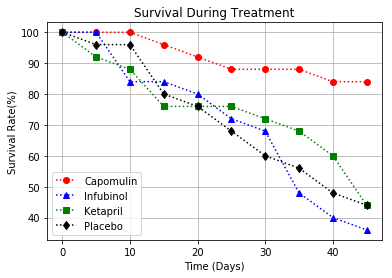

In [22]:
# Generate the Plot (Accounting for percentages)
for i in range(len(drugList)):
    legend=plt.plot(Survival_list_df.index,Survival_list_df[drugList[i]["Drug"]],
                        marker=drugList[i]["Marker"],color=drugList[i]["C"],linestyle=':',label=drugList[i]["Drug"])
# Save the Figure
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate(%)")
plt.xlabel("Time (Days)")
plt.legend()
plt.grid()
# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [24]:
final_df_pivot=final_df.pivot("Drug","Timepoint","Tumor Volume (mm3)_mean")
final_df_pivot= final_df_pivot.loc[['Capomulin','Infubinol','Ketapril','Placebo'],[0,45]]
final_df_pivot["% Survival Rate"]=((final_df_pivot[45]-final_df_pivot[0])/final_df_pivot[0])*100
final_df_pivot.reset_index(inplace=True)
final_df_pivot["color"] = final_df_pivot['% Survival Rate'].apply(lambda x: "red" if x > 0.0 else "green")
final_df_pivot
#Summary_df=pd.DataFrame(columns=[0,45])




Timepoint,Drug,0,45,% Survival Rate,color
0,Capomulin,45.0,36.236114,-19.475303,green
1,Infubinol,45.0,65.755562,46.123472,red
2,Ketapril,45.0,70.662958,57.028795,red
3,Placebo,45.0,68.084082,51.297960,red


<BarContainer object of 4 artists>


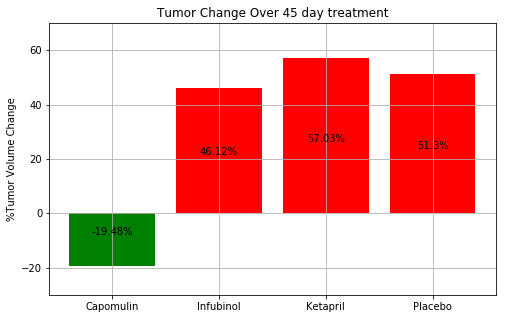

In [25]:
# Store all Relevant Percent Changes into a Tuple
fig,ax=plt.subplots(figsize=(8,5))

bars=[]
s=[]

def autolabel(rects,s):
    # attach some text labels
    for i,rect in enumerate(rects):
       
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.  , .45*height,
               s[i],
                ha='center', va='bottom')

bars1 = (ax.bar(final_df_pivot["Drug"],final_df_pivot["% Survival Rate"],color=final_df_pivot["color"]))

print(bars1)


for i, each in enumerate(final_df_pivot["% Survival Rate"]):
    s.append(str(round(each,2)) + "%")
   # ax.text(x=i-0.25, y= 5 if (each > 0) else -5, s=s)

autolabel(bars1,s
         )

plt.ylim(-30, 70)
plt.yticks(np.arange(-20, 70, 20))

plt.grid(which="both")
plt.ylabel("%Tumor Volume Change")
plt.title("Tumor Change Over 45 day treatment")

# Show the Figure
plt.show()